# Measurements of two operators

One of the things about quantum mechanics that has bothered great minds (such as Einstein) is that a measurement in quantum mechanics can change the system.

In this exercise you will perform measurements of two different quantum operators and your task is to understand how the measurement affects the state of the system.

**Learning goal:** This (hopefully) will give you a valuable expirence with the manner in which quantum mechanical measurements are able to change the state of the system.


**Background / recall:**

A quantum measurement of a physical operator $M$ will change the state of the system into an eigenstate of $M$ (unless the system is already in an eigenstate of $M$). The outcome of the measurement will be one of the eigenvalues of $M$ and the state of the system right after the measuremet will be the associated eigenstate.

**Our first measurement**

We will start the system in the state $|0\rangle$ and then measure the operator 

\begin{equation}
M_z=\left(\begin{array}{cc} 0 & 0 \\ 0 & 1 \end{array}
\right) \ .
\end{equation}


To set up this experiment is stunningly simple!

First we import the relevant packages

In [10]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-12-25 15:20:48,197: Credentials are already in use. The existing account in the session will be replaced.


Now all it takes to set up and run the experiment is the following

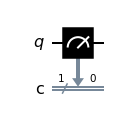

In [11]:
qc = QuantumCircuit(1,1)
qc.measure(0,0)
qc.draw()

In [12]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


We see that we get the result '0' each time (by all means do run the experiment again to check this if you are not convinced by the 10 times we have repeated the experiment). 

Now let us try to understand the result: The matrix above expresses the operator $M_z$ in the basis $|0\rangle$ and  $|1\rangle$. In this basis the states $|0\rangle$ and $|1\rangle$ are respectively 

\begin{equation}
\left(\begin{array}{c} 1 \\ 0 \end{array}
\right) \quad {\rm and} \quad \left(\begin{array}{c} 0 \\ 1 \end{array}
\right) \ .
\end{equation}

**Exercise 1:** Show by means of the matrix representation that $|0\rangle$ is an eigenstate of $M_z$ with eigenvalue $0$.


**Exercise 2:** The measurement of $M_z$ in this particular case does not change the state of the system. Why not?


<b> The second measurement </b>

We will again start the system in the state $|0\rangle$ and now measure the operator 

\begin{equation}
M_x=\frac{1}{2}\left(\begin{array}{cc} 1 & -1 \\ -1 & 1 \end{array}
\right) \ .
\end{equation}


Again this experiment is stunningly simple to set up!

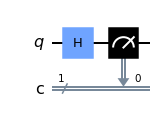

In [13]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw()

In [14]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['1', '1', '0', '1', '1', '0', '1', '0', '0', '1']


First let's try to understand why this was a measurement of $M_x$.

**Exercise 3:** Show that $M_x=H^\dagger M_z H$ where 

\begin{equation}
H=\frac{1}{\sqrt{2}}\left(\begin{array}{cc} 1 & 1 \\ 1 & -1 \end{array}
\right) \ .
\end{equation}

The application of $H$ therefore changes the basis such that we now measure $M_x$ rather than $M_z$.

**Note:** The Unitary operator $H$ is **not** the Hamiltonian, it is known as the Hadamard operator and thus denoted by $H$. Hopefully, this will not lead to unnessesary confusuion. 

Now let's try to understand the result: 

**Exercise 4:** Show that the eigenvalues of $M_x$ are $0$ and $1$.

Since a measurement of an operator will yield one of the eigenvalues of the operator, this explains why we get $0$ and $1$ when we measure $M_x$!

As we can see the measuremet sometimes gives $0$ and sometimes $1$. So apprently the state $|0\rangle$ we started the system in is not an eigenstate of $M_x$, othervise the measuremet would have given the same result each time we repeated the experiment. 

**Exercise 5:** Determine the eigenvectors of $M_x$ and denote the associated states by $|0_x\rangle$ and $|1_x\rangle$.

The probability that we obtain the value $0$ respectively $1$ when the system is in the state $|0\rangle$ and we measure $M_x$ is 

\begin{equation}
P_{0_x} = \big|\langle 0_x|0\rangle\big|^2 \quad {\rm and} \quad  P_{1_x} = \big|\langle 1_x|0\rangle\big|^2
\end{equation}

**Exercise 6 (Your prediction):** Compute the probabilities $P_{0_x}$ and $P_{0_1}$. 

To check your predictions, let's run the experiment 1024 times so we have better statistics.



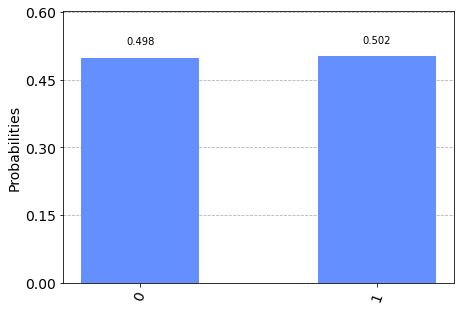

In [15]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

**Note:** The values may not be spot on your prediction, even with 1024 the statistical spread is not negligble. Try to run the experiment (all 1024 repetitions) a few times to get a feeling for the statistical spread. Then check that your predictions are safely within the statistical spread.

**Sequantial measurements:** 

Now let's continue our experiment and measure $M_z$ (after we have measured) $M_x$.

To do this we need to rotate back with $H^\dagger$ before we measure again. 

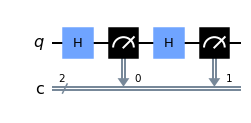

In [16]:
qc = QuantumCircuit(1,2)
qc.h(0)
qc.measure(0,0)
qc.h(0)
qc.measure(0,1)
qc.draw()

... and run the experiment 10 times:

In [17]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['00', '10', '00', '11', '10', '10', '01', '00', '01', '00']


**Here is how to read the result:** We have repeated the experiment 10 times and each time we have done two measurements. The output therefore has 10 pairs, for example '01'.  The rightmost of the two numbers in the pair is the result of the first measurement. This is just like before, where we found a 50-50 chance of obtaining the values $0$ and $1$ when measuring $M_x$. The result of the additional measurement of $M_z$ is the leftmost digit of the pair.

**Check that we understand the outcome of the experiment:** 

As we can se from results the measurement of $M_z$ sometimes gives $1$. The fact that we have measured $M_x$ before the measuremnt of $M_z$ therefore must have changed the state! Had the state still been $|0\rangle$, as it was before we measured $M_x$, the measurement of $M_z$ would have given $0$ with 100% probability (since $|0\rangle$ is an eigenstate of $M_z$ with eigenvalue $0$).

Let's assume that our first measurement of $M_x$ has given the value $1$.

**Exercise 7:** Determine the probability that the measuremt of $M_z$ gives us the value 1.

Next let's assume that our measurement of $M_x$ has given the value $0$.

**Exercise 8:** Determine the probability that the measuremt of $M_z$ gives us the value 1.

Finally, let's not make any assumptions about the outcome of the measurement of $M_x$ (except that we have done the measurement of $M_x$).   

**Exercise 9:** Determine the probability that the measuremt of $M_z$ gives us the value 1.

**Final check:** Finally let's check the results of the exercises above by running the experiment 1024 times.    

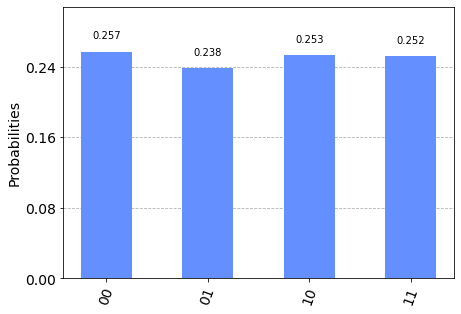

In [18]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

**Conclusion:** As we can see explicitly, the fact that we insert the measurement of $M_x$ before the measurement of $M_z$ changes the outcome of the latter!

**Take away:** Quantum measurements will change the state of the system we do the measurement on (unless the system happens to be in an eigenstate of the operator we measure). 